In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import housing_sim.utils
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt

from housing_sim.mortgage.fixed_rate import SimpleFixedRateMortgage, DownPayableFixedRateMortgage
from housing_sim.housing.simple_home import SimpleHome
from housing_sim.housing.apartment import Apartment

In [2]:
interest = 0.0425
purchase_price = 250000
down_payment_pct = 0.20
months = 360
start = dt.date(2020,1,1)
base_rent = 1000

In [3]:
my_mortgage = SimpleFixedRateMortgage(interest, purchase_price, down_payment_pct, start, months)

In [4]:
my_home = SimpleHome(purchase_price, my_mortgage)

In [5]:
my_apartment = Apartment(base_rent, start, months)

In [6]:
# Plotting setup
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [7]:
#my_mortgage.get_data()

In [20]:
extra_pay_mortgage = DownPayableFixedRateMortgage(interest, purchase_price, down_payment_pct, 
                                                  start, months, extra_payment=200)

In [21]:
extra_pay_mortgage.get_data().head()

,date,month,principal,interest,total_principal,total_interest,balance,pct_paid,extra_principal,total_extra_principal
0,2020-01-01,0,275.546449,708.333333,275.546449,708.333333,199724.453551,0.001378,200.0,200.0
1,2020-02-01,1,277.230676,706.649106,552.777125,1414.982440,199447.222875,0.002764,200.0,400.0
2,2020-03-01,2,278.920868,704.958914,831.697992,2119.941354,199168.302008,0.004158,200.0,600.0
3,2020-04-01,3,280.617046,703.262736,1112.315038,2823.204090,198887.684962,0.005562,200.0,800.0
4,2020-05-01,4,282.319231,701.560551,1394.634270,3524.764641,198605.365730,0.006973,200.0,1000.0


In [22]:
%%markdown

# Mortgage


# Mortgage


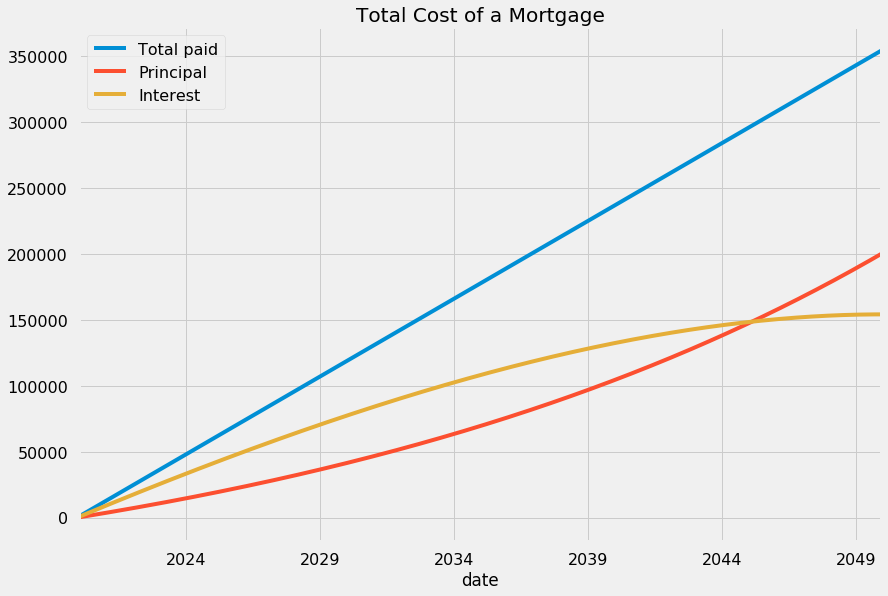

In [23]:
data = my_mortgage.get_data().copy()
data['total_paid'] = data['total_principal'] + data['total_interest']
ax = data.plot(kind='line', x='date', y=['total_paid', 'total_principal', 'total_interest'], 
              title='Total Cost of a Mortgage')
ax.legend(['Total paid', 'Principal', 'Interest'])
plt.show()

In [24]:
data[['total_paid', 'total_principal', 'total_interest']].describe()

,total_paid,total_principal,total_interest
count,360.000000,360.000000,360.000000
mean,177590.300680,79616.950397,97973.350283
std,102389.698607,57159.576656,46892.555804
min,983.879782,275.546449,708.333333
25%,89287.090231,29431.044299,59856.045932
50%,177590.300680,69473.681927,108116.618752
75%,265893.511128,124468.852239,141424.658890
max,354196.721577,200000.000000,154196.721577


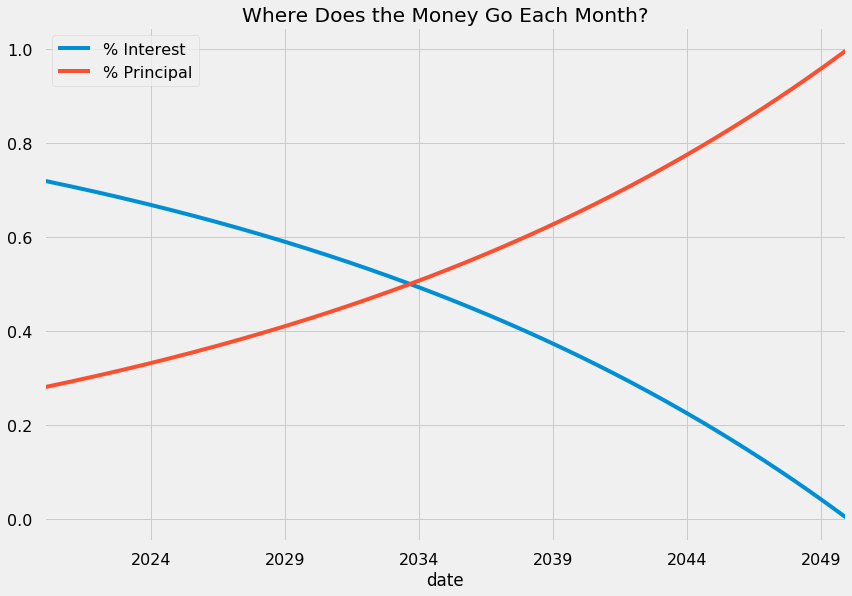

In [25]:
data = my_mortgage.get_data().copy()
data['payment'] = data['principal'] + data['interest']
data['% Interest'] = data['interest'] / data['payment']
data['% Principal'] = data['principal'] / data['payment']
ax = data.plot(kind='line', x='date', y=['% Interest', '% Principal'], 
              title='Where Does the Money Go Each Month?')
ax.legend(['% Interest', '% Principal'])
plt.show()

In [26]:
data[['% Interest', '% Principal']].describe()

,% Interest,% Principal
count,360.000000,360.000000
mean,0.435342,0.564658
std,0.205031,0.205031
min,0.003529,0.280061
25%,0.274459,0.384642
50%,0.471726,0.528274
75%,0.615358,0.725541
max,0.719939,0.996471


In [27]:
#my_mortgage.get_data().head()

In [ ]:
#my_mortgage.get_data().tail()

In [28]:
%%markdown
# Paying down a mortgage early

# Paying down a mortgage early


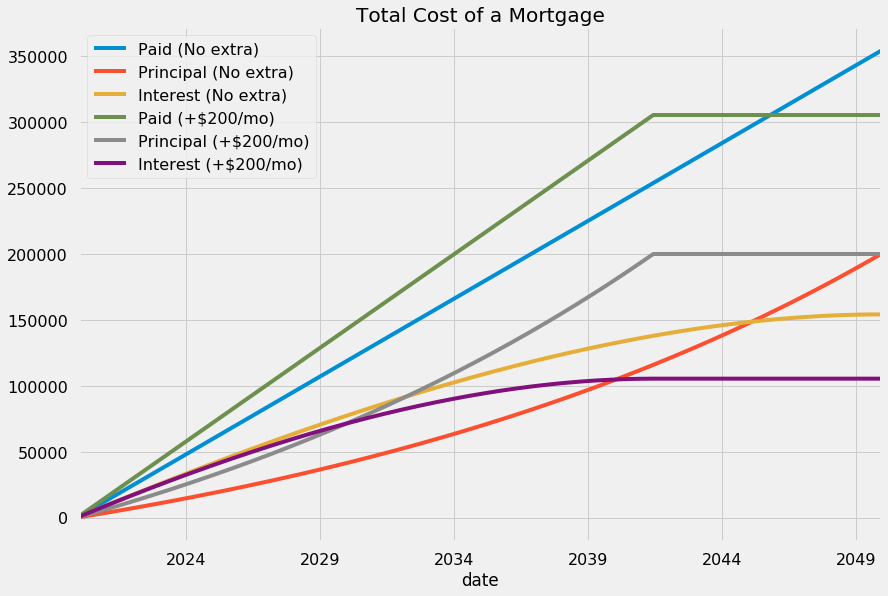

In [29]:
data = my_mortgage.get_data().copy()
data2 = extra_pay_mortgage.get_data().copy()
df = pd.DataFrame()
df['month'] = data['month']
df['date'] = data['date']
df['Paid (No extra)'] = data['total_principal'] + data['total_interest']
df['Principal (No extra)'] = data['total_principal']
df['Interest (No extra)'] = data['total_interest']
df['Paid (+$200/mo)'] = data2['total_principal'] + data2['total_extra_principal'] + data2['total_interest']
df['Principal (+$200/mo)'] = data2['total_principal'] + data2['total_extra_principal']
df['Interest (+$200/mo)'] = data2['total_interest']

ax = df.plot(kind='line', x='date', y=['Paid (No extra)', 'Principal (No extra)', 'Interest (No extra)',
                                       'Paid (+$200/mo)', 'Principal (+$200/mo)', 'Interest (+$200/mo)'], 
              title='Total Cost of a Mortgage')
plt.show()

In [ ]:
%%markdown

# Home Ownership

In [ ]:
data = my_home.get_data()
data['total'] = data['total_direct'] + data['total_indirect']
data['equity'] = data['home_value'] * data['home_ownership_pct']
ax = data.plot(kind='line', x='date', y=['total', 'equity', 'home_value'], 
              title='How Much Does Home Ownership Cost?')
ax.legend(['Total Paid', 'Equity Built', 'Value of Home'])
plt.show()

In [ ]:
data[['total', 'equity', 'home_value']].describe()

In [ ]:
%%markdown

# Direct vs Indirect Costs

In [ ]:
data = my_home.get_data().copy()
data = data.groupby(data['date'].dt.year).sum().reset_index()
ax = data.plot(kind='bar', x='date', y=['indirect','direct'], color=['#FC452B', '#0084CF'],
                  title='Direct vs Indirect Costs (Yearly)', stacked=True)
ax.legend(['Indirect Costs', 'Direct Costs'])
plt.show()

In [ ]:
data[['indirect','direct']].describe()

In [ ]:
data = my_home.get_data().copy()
data = data.groupby(data['date'].dt.year).sum().reset_index()
data['direct'] /= 12
data['indirect'] /= 12
data = data[1:]
ax = data.plot(kind='bar', x='date', y=['indirect','direct'], color=['#FC452B', '#0084CF'],
                  title='Direct vs Indirect Costs (Monthly Avg excl. first year)', stacked=True)
ax.legend(['Indirect Costs', 'Direct Costs'])
plt.show()

In [ ]:
data[['indirect','direct']].describe()

In [ ]:
data = my_home.get_data().copy()
data = data.groupby(data['date'].dt.year).sum().reset_index()
data['% Indirect'] = data['indirect'] / (data['indirect'] + data['direct'])
data['% Direct'] = data['direct'] / (data['indirect'] + data['direct'])
ax = data.plot(kind='line', x='date', y=['% Direct','% Indirect'],
                  title='Direct vs Indirect Costs Yearly)')
ax.legend(['Direct Costs', 'Indirect Costs'])
plt.show()

In [ ]:
data[['% Direct','% Indirect']].describe()

In [ ]:
my_home.get_data()
data = my_home.indirect_cost_data.copy()
data['date'] = my_home.data['date']
data = data.groupby(data['date'].dt.year).sum().reset_index()
ax = data.plot(kind='bar', x='date', y=['interest', 'property_tax','homeowners_insurance', 'fees'], 
               title='Where Do I Lose Money each Year?', stacked=True)
ax.legend(['Mortgage Interest', 'Property Tax', 'Insurance', 'Fees'])
plt.show()

In [ ]:
data[['interest', 'property_tax','homeowners_insurance', 'fees']].describe()

In [ ]:
# %%markdown

# # Rent

In [ ]:
# data = my_apartment.get_data()
# ax = data.plot(kind='line', x='date', y=['total_rent'], 
#               title='How Much Rent Do I Pay?')
# ax.legend(['Rent'])
# plt.show()

In [ ]:
%%markdown

# Comparing Rent vs Home Ownership

In [ ]:
data = my_home.get_data()
data['total_rent'] = my_apartment.get_data()['total_rent']
ax = data.plot(kind='line', x='date', y=['total_rent', 'total_indirect'], 
              title='Rent vs Indirect Costs (Cumulative) - lower is better')
ax.legend(['Rent', 'Home Indirect'])
plt.show()

In [ ]:
data[['total_rent', 'total_indirect']].describe()

In [ ]:
data = my_home.get_data().join(my_apartment.get_data()[['rent', 'total_rent']])
data = data.groupby(data['date'].dt.year).sum().reset_index()
ax = data.plot(kind='bar', x='date', y=['rent', 'indirect'], 
              title='Rent vs Indirect Costs (Yearly) - lower is better')
ax.legend(['Rent', 'Home Indirect'])
plt.show()

In [ ]:
data[['rent', 'indirect']].describe()

In [ ]:
data = my_home.get_data().join(my_apartment.get_data()[['rent', 'total_rent']])
data = data.groupby(data['date'].dt.year).sum().reset_index()
data['total'] = data['direct'] + data['indirect']

ax = data.plot(kind='bar', x='date', y=['rent', 'total'], 
              title='Rent vs Total Costs (Yearly) - lower is better')
ax.legend(['Rent', 'Home Total'])
plt.show()

In [ ]:
data[['rent', 'total']].describe()

In [ ]:
data = my_home.get_data().join(my_apartment.get_data()[['rent','total_rent']])
data['equity'] = data['home_value'] * data['home_ownership_pct']
data['total'] = data['total_direct'] + data['total_indirect']
data['net_loss'] =  data['total'] - data['equity']
data = data.groupby(data['date'].dt.year).sum().reset_index()
ax = data.plot(kind='line', x='date', y=['net_loss', 'total_indirect', 'total_rent'], 
              title='Losses Over Time  - lower is better')
ax.legend(['Total spent minus Equity built','Total Indirect', 'Total Rent'])
plt.show()

In [ ]:
data[['net_loss', 'total_indirect', 'total_rent']].describe()

In [ ]:
data = my_home.get_data().join(my_apartment.get_data()[['rent','total_rent']])
data['equity'] = data['home_value'] * data['home_ownership_pct']
data['total'] = data['total_direct'] + data['total_indirect']
data['rent_vs_indirect'] = data['total_rent'] - data['total_indirect']
data['rent_vs_net_loss'] = data['total_rent'] - (data['total'] - data['equity'])
data['oop_diff'] = data['total_rent'] - data['total']
data = data.groupby(data['date'].dt.year).max()
ax = data.plot(kind='line', x='date', y=['rent_vs_indirect', 'oop_diff', 'rent_vs_net_loss'], 
              title='Different Ways of Looking at Rent vs Home Ownership - higher is better')
ax.legend(['Money Lost - Rent above Indirect Costs ', 
           'Out of pocket difference - Rent above Home Total Cost',
           'Money Lost Adjusted for Home Appreciation - Rent above (Home Total-Equity)'])
plt.show()

In [ ]:
data[['rent_vs_indirect', 'oop_diff', 'rent_vs_net_loss']].describe()

In [ ]:
print("Home\nPurchase price ${:.2f}. \nYearly appreciation rate: {:.2f}%".format(my_home.purchase_price, my_home.appreciation_rate*100))
print("\nMortgage\n${:.2f} fixed payment. \nYearly interest rate: {:.2f}%. \nDown payment: {:.2f}%".format(my_mortgage.fixed_monthly_payment_size, my_mortgage.interest_rate*100, my_mortgage.down_payment_pct*100))
print("\nRent: \n${}/month. \nYearly increase rate: {:.2f}%".format(my_apartment.base_rent, my_apartment.yearly_increase_rate*100))


In [ ]:
%%markdown

## Graph Summary
### **Money Lost - Rent above Indirect Costs:**
Considering only rent vs our indirect expenses of insurance, interest, property taxes, and fees. 

Renting starts out cheaper, but as the main indirect expense-mortgage interest-decreases,
renting becomes more expensinve towards the very end of the mortgage.

### **Out of pocket difference - Rent above Home Total Cost:**
Considering the TOTAL cost of home ownership vs renting. This is how much money gets spent, whether it goes
towards building equity or not.

### **Money Lost Adjusted for Home Appreciation - Rent above (Home Total-Equity):**
Homes generally appreciate in value. Instead of measuring total indirect costs as our "cost of home ownership",
instead we should measure the total amount spent on the home, minus the amount of equity we've built up.
With each principal payment we make, we own more and more of our house. 
This makes the difference in our net worth smaller than if we were only considering indirect costs.

In [ ]:
%%markdown

# Simulating Rental Income

Let's be real - with all of the additional space we'll have with a house, we should consider renting out a room.
That being said, I only want to do it for the first few years to make owning a home more affordable upfront.

## Guide
### Additional out of pocket
Consider the difference between paying rent and the total cost of home ownership. 
This is the net difference we'd pay above renting.

`additional out of pocket = (total cost of home - rental income) - total rent we'd pay if we were renting`

### Total out of pocket
The straight total cost of home ownership

`total out of pocket = total cost - rental income`

### Net loss
The net loss in total wealth.

`net loss = total cost - equity - rental income`

In [ ]:
# renting a room for the first couple years
rental_income_rates = np.arange(500*12, 1100*12, 100*12)
rental_years = 7
rental_incomes = rental_income_rates.repeat(rental_years).reshape(len(rental_income_rates), rental_years)
total_years = data.shape[0]
nonrental_incomes = np.zeros((rental_incomes.shape[0], total_years-rental_years))
monthly_incomes = np.hstack((rental_incomes, nonrental_incomes))
data2 = data[['oop_diff', 'total', 'equity', 'total_rent', 'date']].copy().drop('date', axis=1).reset_index()
data2['No room rental (ADDL)'] = -1 * data2['oop_diff']
data2['No room rental (T)'] = data2['total']
data2['No room rental (Net)'] = data2['total'] - data2['equity']
be_renter = 'Being the renter starting at ${:.0f}/mo (Net)'.format(my_apartment.base_rent)
data2[be_renter] = data2['total_rent']
addl_oop_colnames = ['No room rental (ADDL)']
total_oop_colnames = ['No room rental (T)']
net_loss_colnames = ['No room rental (Net)', be_renter]
for i in range(len(rental_income_rates)):
    income_rate = rental_income_rates[i]
    rent_colname_base = 'Rent room at ${:.0f}/mo for first {} years'.format(income_rate/12, rental_years)
    addl_oop_colname = rent_colname_base + " (ADDL)"
    addl_oop_colnames.append(addl_oop_colname)
    total_oop_colname = rent_colname_base + " (T)"
    total_oop_colnames.append(total_oop_colname)
    net_loss_colname = rent_colname_base + " (Net)"
    net_loss_colnames.append(net_loss_colname)
    rent_collected = pd.Series(monthly_incomes[i]).expanding(min_periods=1).sum()
    data2['rent collected {}'.format(income_rate)] = rent_collected
    data2[addl_oop_colname] = data2['No room rental (ADDL)'] - rent_collected 
    data2[total_oop_colname] = data2['total'] - rent_collected
    data2[net_loss_colname] = data2['No room rental (Net)'] - rent_collected

In [ ]:
ax = data2.plot(kind='line', x='date', y=addl_oop_colnames, 
              title='Addl Out of pocket costs - lower is better')
plt.show()

In [ ]:
data2[addl_oop_colnames].describe()

In [ ]:
ax = data2.plot(kind='line', x='date', y=total_oop_colnames, 
              title='Total Out of pocket costs - lower is better')
plt.show()

In [ ]:
data2[total_oop_colnames].describe()

In [ ]:
ax = data2.plot(kind='line', x='date', y=net_loss_colnames,
              title='Net Loss - lower is better')
plt.show()

In [ ]:
data2[net_loss_colnames].describe()